In [ ]:
import shutil
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
shutil.copytree("/content/drive/MyDrive/Thesis_partB/annotations/A_splits","/content/datasets/") # copy dataset into workspace


'/content/datasets/'

In [ ]:
def organize_data(source):

  # Specify the source folder containing images and text files
  source_folder = source #'/content/dataset/'

  # Specify the destination folder for images and text files
  destination_folder_images =  source_folder+'/images'
  destination_folder_labels = source_folder+'/labels'

  # Create the destination folders if they don't exist
  os.makedirs(destination_folder_images, exist_ok=True)
  os.makedirs(destination_folder_labels, exist_ok=True)

  # Iterate through the files in the source folder
  for filename in os.listdir(source_folder):
      source_file = os.path.join(source_folder, filename)

      # Check if the file is an image
      if filename.lower().endswith(('.jpeg')):
          destination_file = os.path.join(destination_folder_images, filename)
          shutil.move(source_file, destination_file)
          print(f"Moved image: {filename} to {destination_folder_images}")

      # Check if the file is a text file
      elif filename.lower().endswith('.txt'):
          destination_file = os.path.join(destination_folder_labels, filename)
          shutil.move(source_file, destination_file)
          print(f"Moved text file: {filename} to {destination_folder_labels}")

      else:
          print(f"Skipping file: {filename}")

  print("Finished moving files.")
organize_data('/content/datasets/test')
organize_data('/content/datasets/train')
organize_data('/content/datasets/val')



Moved image: 0001265.jpeg to /content/datasets/test/images
Moved text file: 0002863.txt to /content/datasets/test/labels
Moved text file: 0002961.txt to /content/datasets/test/labels
Moved text file: 0000821.txt to /content/datasets/test/labels
Moved image: 0003415.jpeg to /content/datasets/test/images
Moved text file: 0002861.txt to /content/datasets/test/labels
Moved image: 0003187.jpeg to /content/datasets/test/images
Moved image: 0000767.jpeg to /content/datasets/test/images
Moved image: 0001273.jpeg to /content/datasets/test/images
Moved text file: 0000765.txt to /content/datasets/test/labels
Moved image: 0000867.jpeg to /content/datasets/test/images
Moved text file: 0002911.txt to /content/datasets/test/labels
Moved image: 0000763.jpeg to /content/datasets/test/images
Moved image: 0001163.jpeg to /content/datasets/test/images
Moved image: 0003005.jpeg to /content/datasets/test/images
Moved image: 0001779.jpeg to /content/datasets/test/images
Skipping file: images
Moved text file:

In [ ]:

def data_labels_count(annotationFolder):
  # Path to the folder containing annotation files (YOLO format)
  annotation_folder = annotationFolder#'/content/dataset/train/labels/'

  # Create a dictionary to store class counts
  class_counts = {}

  # Iterate through annotation files
  for filename in os.listdir(annotation_folder):
      if filename.lower().endswith('.txt'):
          with open(os.path.join(annotation_folder, filename), 'r') as file:
              lines = file.readlines()
              for line in lines:
                  class_id = int(line.split()[0])
                  if class_id in class_counts:
                      class_counts[class_id] += 1
                  else:
                      class_counts[class_id] = 1

  # Print the class counts
  for class_id, count in class_counts.items():
      print(f"Class {class_id}: {count} instances")
  # Create a bar plot
  class_labels = ['Clog', 'Leak']
  instance_counts = [class_counts.get(0, 0), class_counts.get(1, 0)]

  plt.bar(class_labels, instance_counts)
  plt.xlabel('Class')
  plt.ylabel('Number of Instances')
  plt.title('Instances per Class')
  plt.show()



In [ ]:
def statistics_folder(image_dir,label_dir):
  # Directory containing your images
  # Directory containing your label text files

  # Initialize lists to store statistics for each image
  mean_values_clog = []
  std_deviations_clog = []
  min_values_clog = []
  max_values_clog = []

  mean_values_leak = []
  std_deviations_leak = []
  min_values_leak = []
  max_values_leak = []

  # Loop through each text file in the label folder
  for label_filename in os.listdir(label_dir):
      if label_filename.endswith('.txt'):
          # Extract the image name from the label filename
          image_name = os.path.splitext(label_filename)[0]

          # Load the corresponding image
          image_path = os.path.join(image_dir, image_name + '.jpeg')  # Modify the extension as needed
          if not os.path.isfile(image_path):
              continue  # Skip if the image doesn't exist

          image = cv2.imread(image_path)

          # Read the label file and process the objects
          with open(os.path.join(label_dir, label_filename), 'r') as label_file:
              for line in label_file:
                  # Parse the label line (assuming it contains object coordinates)
                  # For example, if the line format is: "leak 100 100 200 200", you can extract the coordinates
                  label, x, y, w, h = line.strip().split()
                  x, y, w, h = map(float, [x, y, w, h])
                  # Extract the object ROI from the image

                  x1, y1, x2, y2 = int(x * image.shape[1]), int(y * image.shape[0]), int((x + w) * image.shape[1]), int((y + h) * image.shape[0])

                  object_roi = image[y1:y2, x1:x2]

                  # Calculate statistics for the object ROI
                  mean_value = np.mean(object_roi)
                  std_deviation = np.std(object_roi)
                  min_value = np.min(object_roi)
                  max_value = np.max(object_roi)
                  if label == '0':
                    # Append the statistics to the respective lists
                    mean_values_clog.append(mean_value)
                    std_deviations_clog.append(std_deviation)
                    min_values_clog.append(min_value)
                    max_values_clog.append(max_value)
                  else:
                    mean_values_leak.append(mean_value)
                    std_deviations_leak.append(std_deviation)
                    min_values_leak.append(min_value)
                    max_values_leak.append(max_value)

  # Calculate overall statistics for all objects in the folder
  overall_mean_clog = np.mean(mean_values_clog)
  overall_std_dev_clog = np.mean(std_deviations_clog)
  overall_min_clog = np.min(min_values_clog)
  overall_max_clog = np.max(max_values_clog)

  # Print or use the calculated overall statistics as needed
  print(f"Number of instances - Clog: {len(mean_values_clog)}")

  print(f"Overall Mean Pixel Value Clog: {overall_mean_clog}")
  print(f"Overall Standard Deviation Clog: {overall_std_dev_clog}")
  print(f"Overall Min Pixel Value Clog: {overall_min_clog}")
  print(f"Overall Max Pixel Value Clog: {overall_max_clog}")

    # Calculate overall statistics for all objects in the folder
  overall_mean_leak = np.mean(mean_values_leak)
  overall_std_dev_leak = np.mean(std_deviations_leak)
  overall_min_leak = np.min(min_values_leak)
  overall_max_leak = np.max(max_values_leak)

  # Print or use the calculated overall statistics as needed
  print(f"number of instances - leak: {len(mean_values_leak)}")

  print(f"Overall Mean Pixel Value leak: {overall_mean_leak}")
  print(f"Overall Standard Deviation leak: {overall_std_dev_leak}")
  print(f"Overall Min Pixel Value leak: {overall_min_leak}")
  print(f"Overall Max Pixel Value leak: {overall_max_leak}")



In [ ]:

def data_labels_statistics(label_dir,image_dir, dataset):
    # Path to the folder containing annotation files (YOLO format)

    # Create empty lists to store data
    labels = []
    means = []
    stds = []
    mins = []
    percentile_5 = []
    percentile_95 = []
    maxs = []

    # Loop through each text file in the label folder
    for label_filename in os.listdir(label_dir):
        if label_filename.endswith('.txt'):
            # Extract the image name from the label filename
            image_name = os.path.splitext(label_filename)[0]

            # Load the corresponding image
            image_path = os.path.join(image_dir, image_name + '.jpeg')  # Modify the extension as needed
            if not os.path.isfile(image_path):
                continue  # Skip if the image doesn't exist

            image = cv2.imread(image_path)

            # Read the label file and process the objects
            with open(os.path.join(label_dir, label_filename), 'r') as label_file:
                for line in label_file:
                    # Parse the label line (assuming it contains object coordinates)
                    # For example, if the line format is: "leak 100 100 200 200", you can extract the coordinates
                    label, x, y, w, h = line.strip().split()
                    x, y, w, h = map(float, [x, y, w, h])
                    # Extract the object ROI from the image

                    x1, y1, x2, y2 = int(x * image.shape[1]), int(y * image.shape[0]), int((x + w) * image.shape[1]), int((y + h) * image.shape[0])

                    object_roi = image[y1:y2, x1:x2]

                    # Calculate statistics for the object ROI
                    label = label
                    mean_value = np.mean(object_roi)
                    std_deviation = np.std(object_roi)
                    min_value = np.min(object_roi)
                    max_value = np.max(object_roi)
                    p5 = np.percentile(object_roi, 5)
                    p95 = np.percentile(object_roi, 95)

                    # Append values to lists
                    labels.append(label)
                    means.append(mean_value)
                    stds.append(std_deviation)
                    mins.append(min_value)
                    percentile_5.append(p5)
                    percentile_95.append(p95)
                    maxs.append(max_value)

    # Create a DataFrame
    df = pd.DataFrame({
        'Label': labels,
        'Dataset': [dataset] * len(labels),
        'Mean': means,
        'Std': stds,
        'Min': mins,
        'P5': percentile_5,
        'P95': percentile_95,
        'Max': maxs
    })

    return df

# Example usage:
dataset = "Train"
label_dir = '/content/datasets/train/labels/'
image_dir = '/content/datasets/train/images/'
df_train = data_labels_statistics(label_dir, image_dir,dataset)


dataset = "Val"
label_dir = '/content/datasets/val/labels/'
image_dir = '/content/datasets/val/images/'
df_Val = data_labels_statistics(label_dir, image_dir,dataset)


dataset = "Test"
label_dir = '/content/datasets/test/labels/'
image_dir = '/content/datasets/test/images/'
df_test = data_labels_statistics(label_dir, image_dir,dataset)
# Print or further process the DataFrame as needed


data = [df_train, df_Val,df_test]
df = pd.concat(data)

In [ ]:
print(df)
print(df.columns)

     Label Dataset        Mean        Std  Min    P5    P95  Max
0        0   Train  187.271350  75.247192   80  82.0  255.0  255
1        0   Train  182.847176  78.819318   69  73.0  255.0  255
2        0   Train   95.907407  14.154267   85  85.0  127.0  173
3        0   Train  179.584204  78.025444   70  75.0  255.0  255
4        0   Train  178.637043  79.313994   58  69.0  255.0  255
...    ...     ...         ...        ...  ...   ...    ...  ...
1399     0    Test  143.190698  71.994108   56  68.0  255.0  255
1400     0    Test  124.832950  63.603095   58  69.0  255.0  255
1401     0    Test  130.762526  68.533485   59  66.0  255.0  255
1402     1    Test  168.907384  80.580180   63  70.0  255.0  255
1403     1    Test  130.694901  62.137712   63  68.0  241.0  255

[14292 rows x 8 columns]
Index(['Label', 'Dataset', 'Mean', 'Std', 'Min', 'P5', 'P95', 'Max'], dtype='object')


In [ ]:
def hue_regplot(data, x, y, hue, palette=None, **kwargs):
    from matplotlib.cm import get_cmap

    regplots = []

    levels = data[hue].unique()

    if palette is None:
        default_colors = get_cmap('tab10')
        palette = {k: default_colors(i) for i, k in enumerate(levels)}

    for key in levels:
        regplots.append(
            sns.regplot(
                x=x,
                y=y,
                data=data[data[hue] == key],
                color=palette[key],
                **kwargs
            )
        )

    return regplots

In [ ]:
def disp_hue_regplot_labels(Data):
    sns.set(font_scale=2)
    sns.set_style("whitegrid")

    predictors = ['Mean', 'Std', 'Min', 'P5', 'P95', 'Max']
    rows_in_fig = len(predictors)

    a = rows_in_fig
    b = 2
    c = 1
    var_number = 1

    palette = {"1": "tab:blue", "0": "tab:red"}

    fig, axes = plt.subplots(a, b, figsize=(35, a * 8))
    fig.tight_layout(h_pad=5)

    for i in predictors:
        axes[c - 1, 0].set_xlabel(' ')
        sns.boxplot(x="Label", y=i, order=["1", "0"], data=Data, palette=palette, boxprops=dict(alpha=0.4), ax=axes[c - 1, 0])
        axes[c - 1, 1].set_xlabel(' ')
        sns.histplot(Data, x=i, hue="Label", hue_order=["1", "0"], kde=True, legend=True, palette=palette, alpha=0.3,
                     line_kws=dict(linewidth=5), ax=axes[c - 1, 1])
        axes[c - 1, 1].set_title(i, fontsize=25, fontweight="bold")

        if c == rows_in_fig:
            plt.show()
            fig, axes = plt.subplots(a, b, figsize=(35, a * 8))
            fig.tight_layout(h_pad=5)
            c = 0

        c += 1

    plt.show()

def disp_hue_regplot_dataset(Data):
    sns.set(font_scale=2)
    sns.set_style("whitegrid")

    predictors = ['Mean', 'Std', 'Min', 'P5', 'P95', 'Max']
    rows_in_fig = len(predictors)

    a = rows_in_fig
    b = 2
    c = 1
    var_number = 1

    palette = {"Train": "tab:green", "Val": "tab:blue", "Test": "tab:red"}

    fig, axes = plt.subplots(a, b, figsize=(35, a * 8))
    fig.tight_layout(h_pad=5)

    for i in predictors:
        axes[c - 1, 0].set_xlabel(' ')
        sns.boxplot(x="Dataset", y=i, order=["Train", "Val","Test"], data=Data, palette=palette, boxprops=dict(alpha=0.4), ax=axes[c - 1, 0])
        axes[c - 1, 1].set_xlabel(' ')
        sns.histplot(Data, x=i, hue="Dataset", hue_order=["Train", "Val","Test"], kde=True, legend=True, palette=palette, alpha=0.3,
                     line_kws=dict(linewidth=5), ax=axes[c - 1, 1])
        axes[c - 1, 1].set_title(i, fontsize=25, fontweight="bold")

        if c == rows_in_fig:
            plt.show()
            fig, axes = plt.subplots(a, b, figsize=(35, a * 8))
            fig.tight_layout(h_pad=5)
            c = 0

        c += 1

    plt.show()

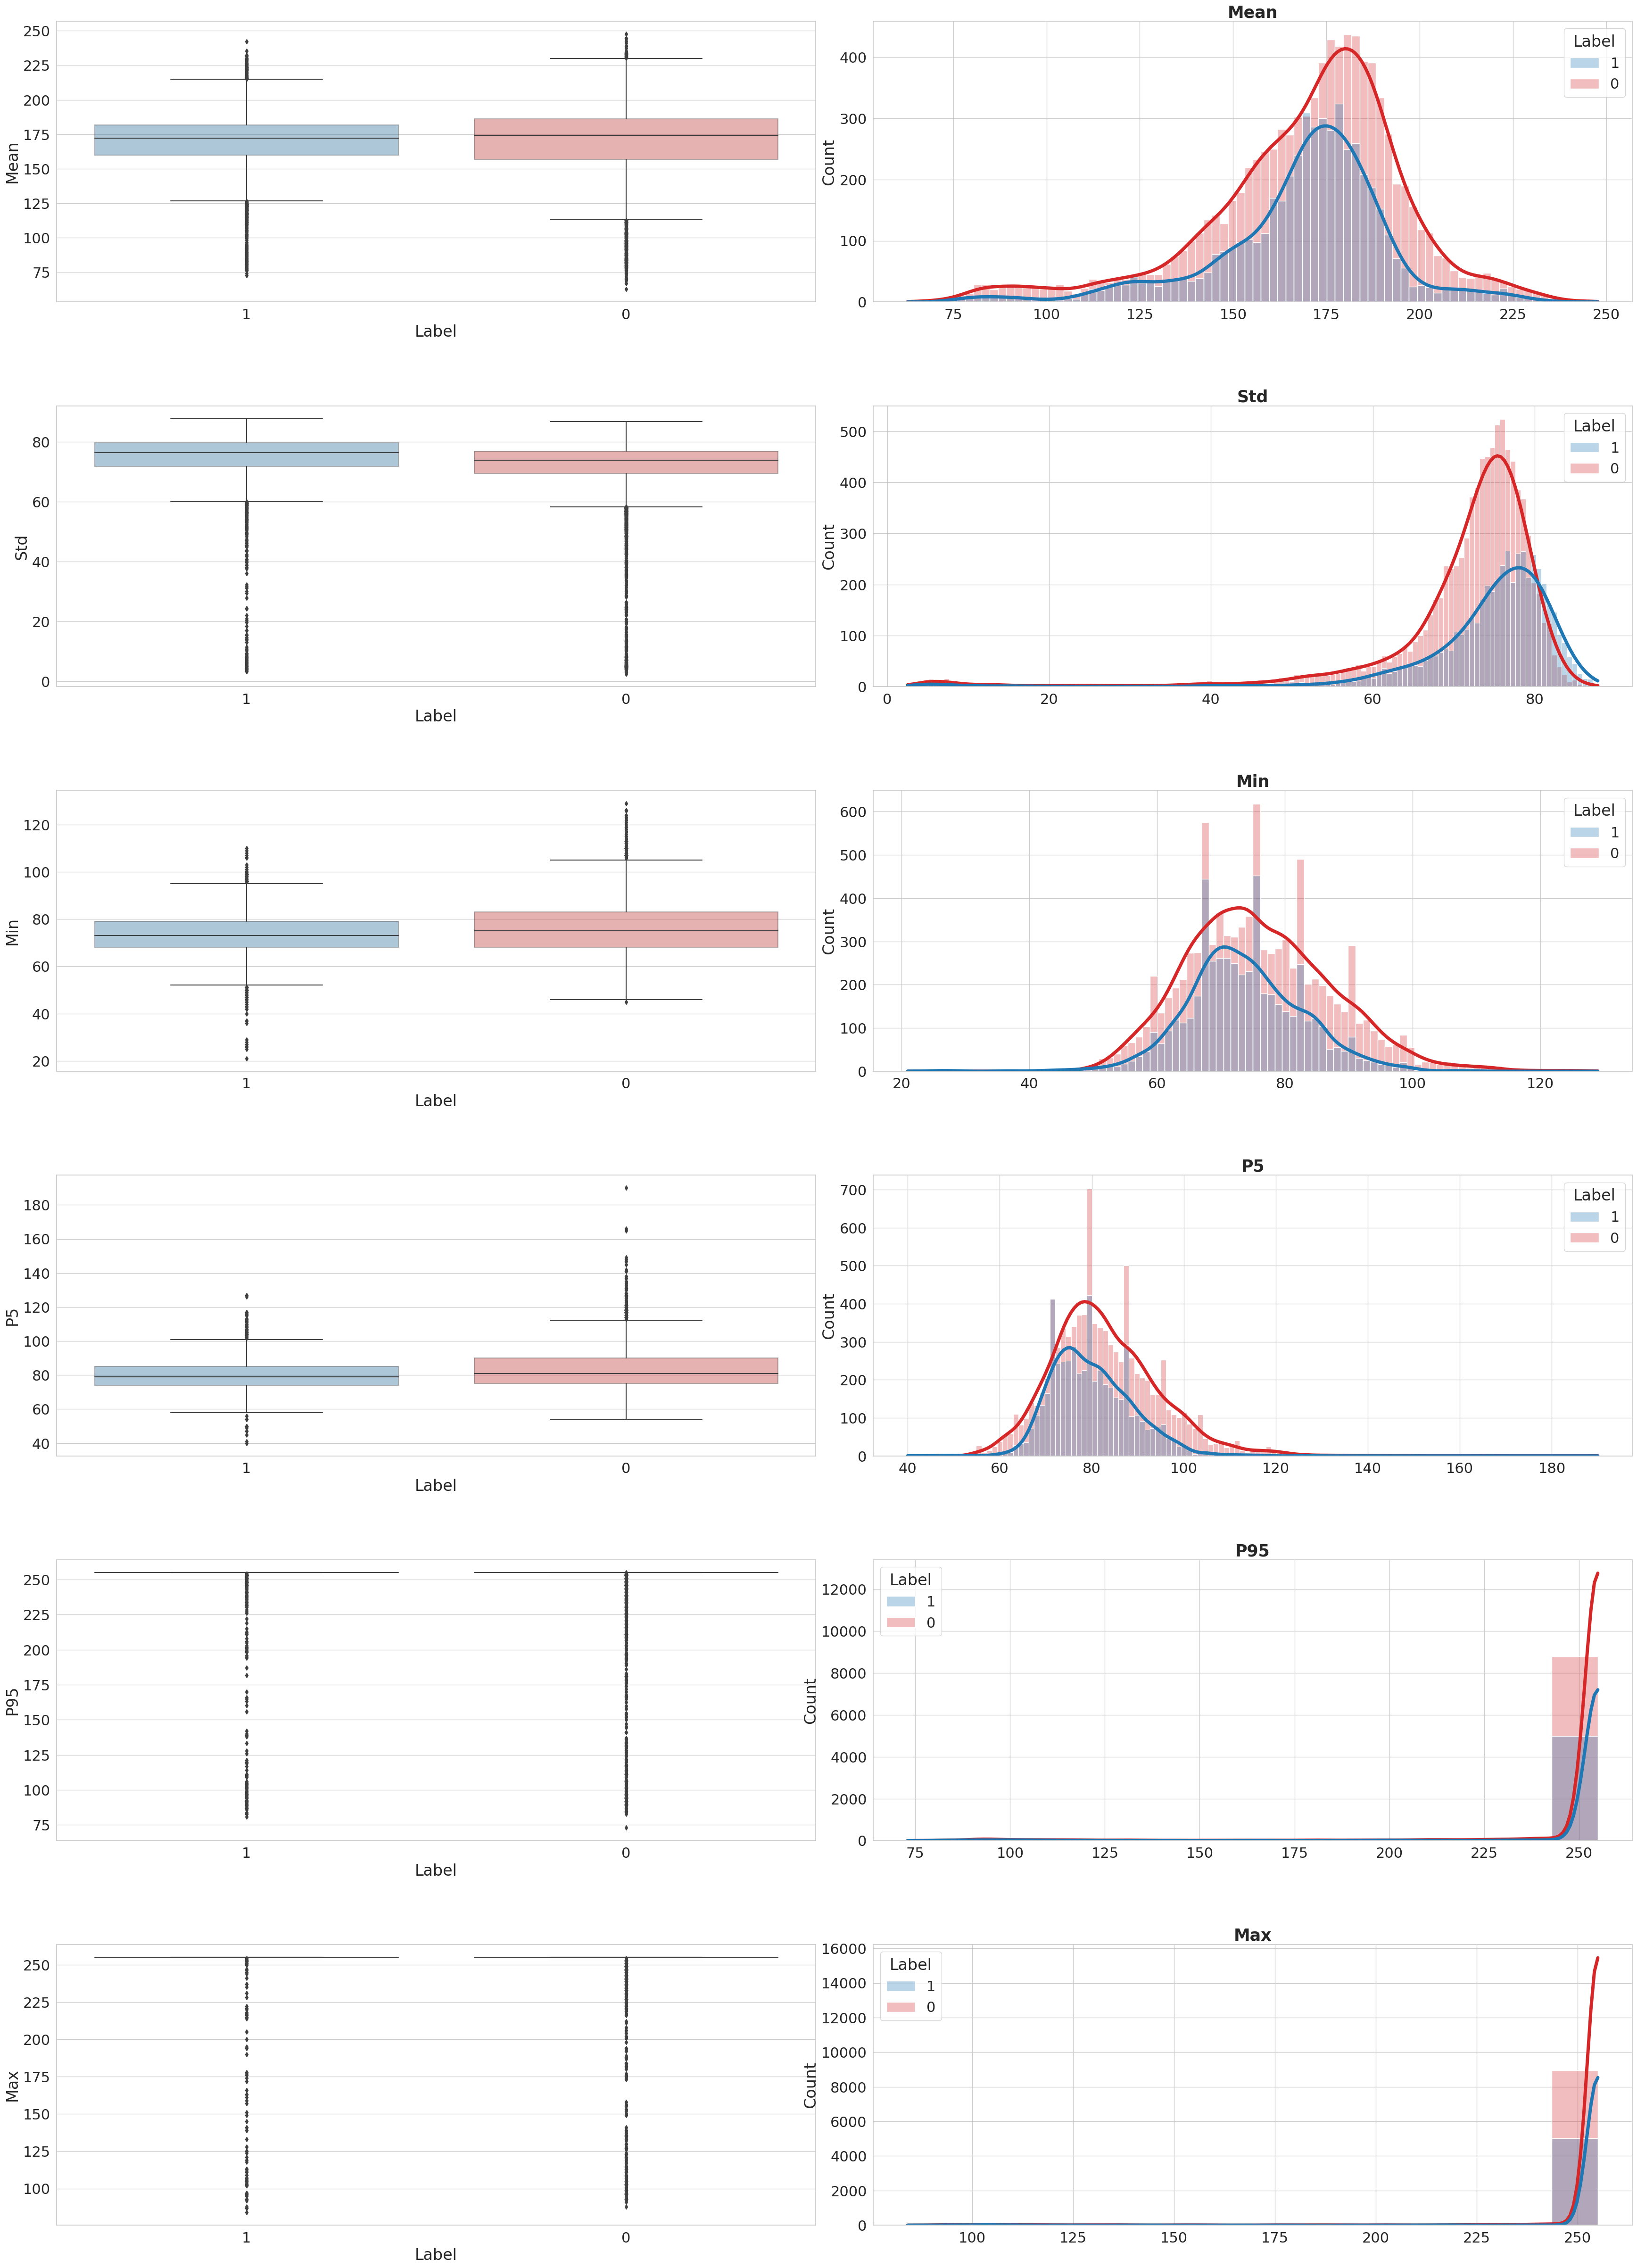

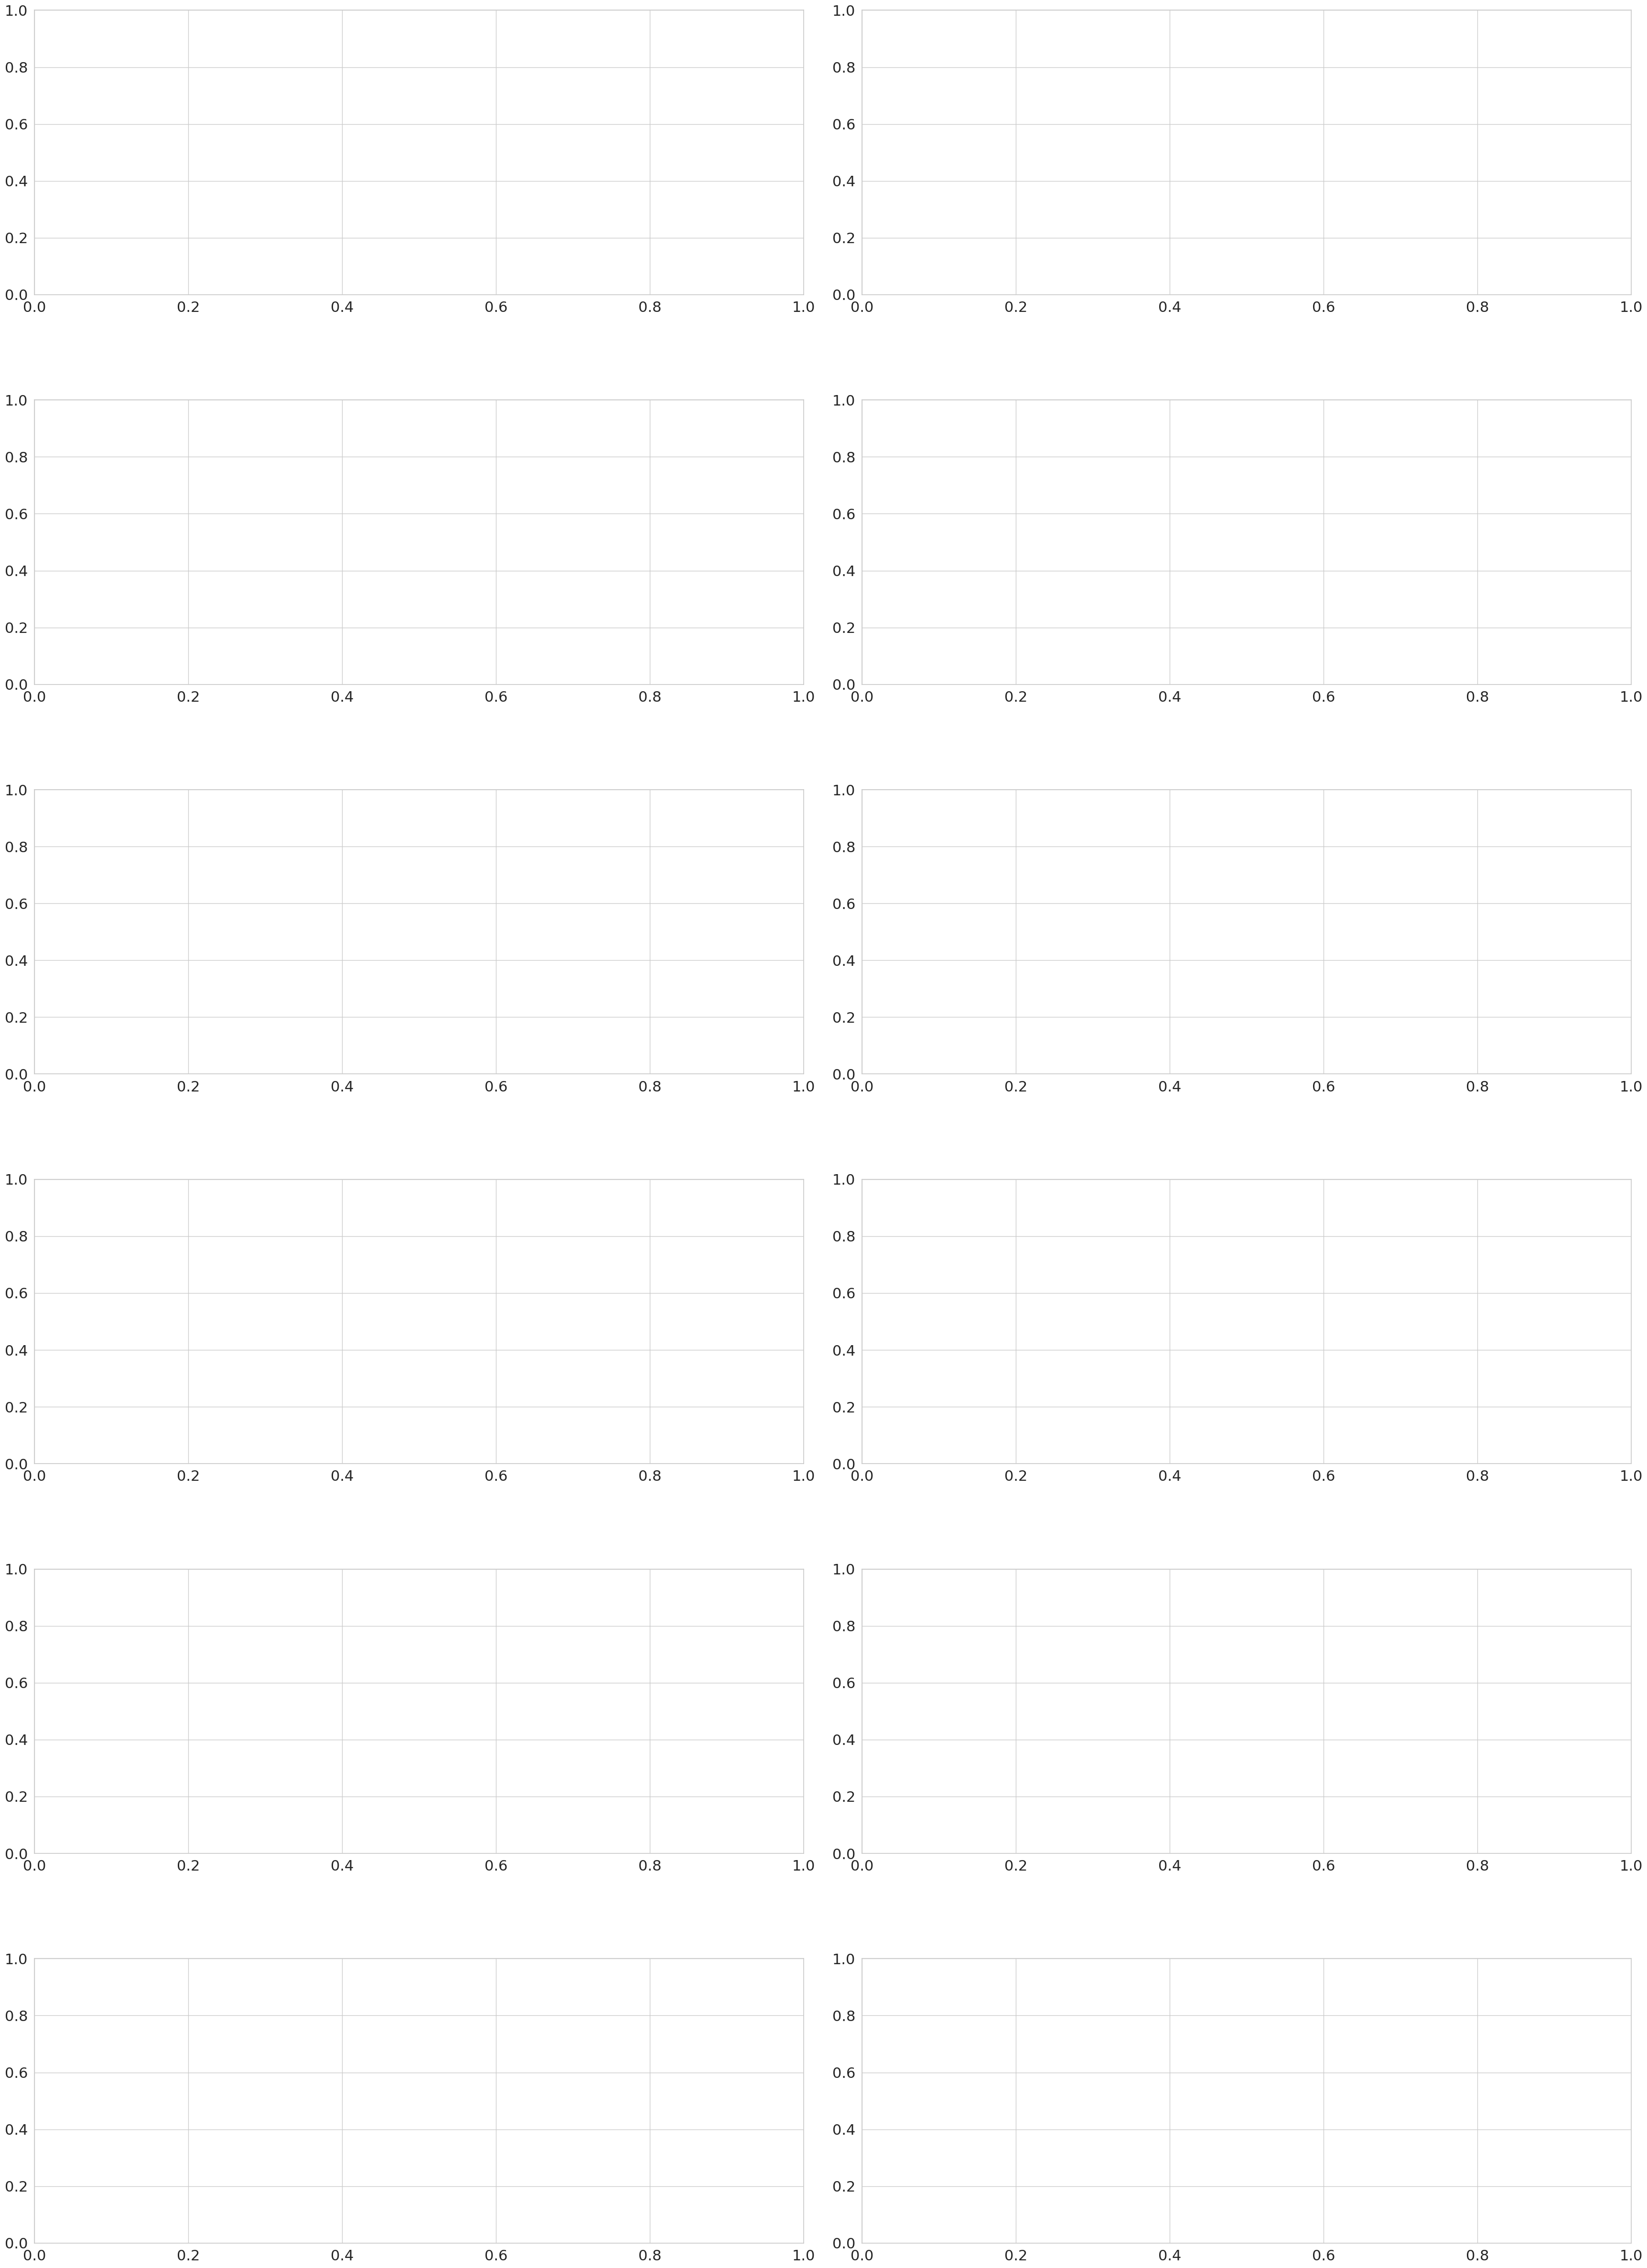

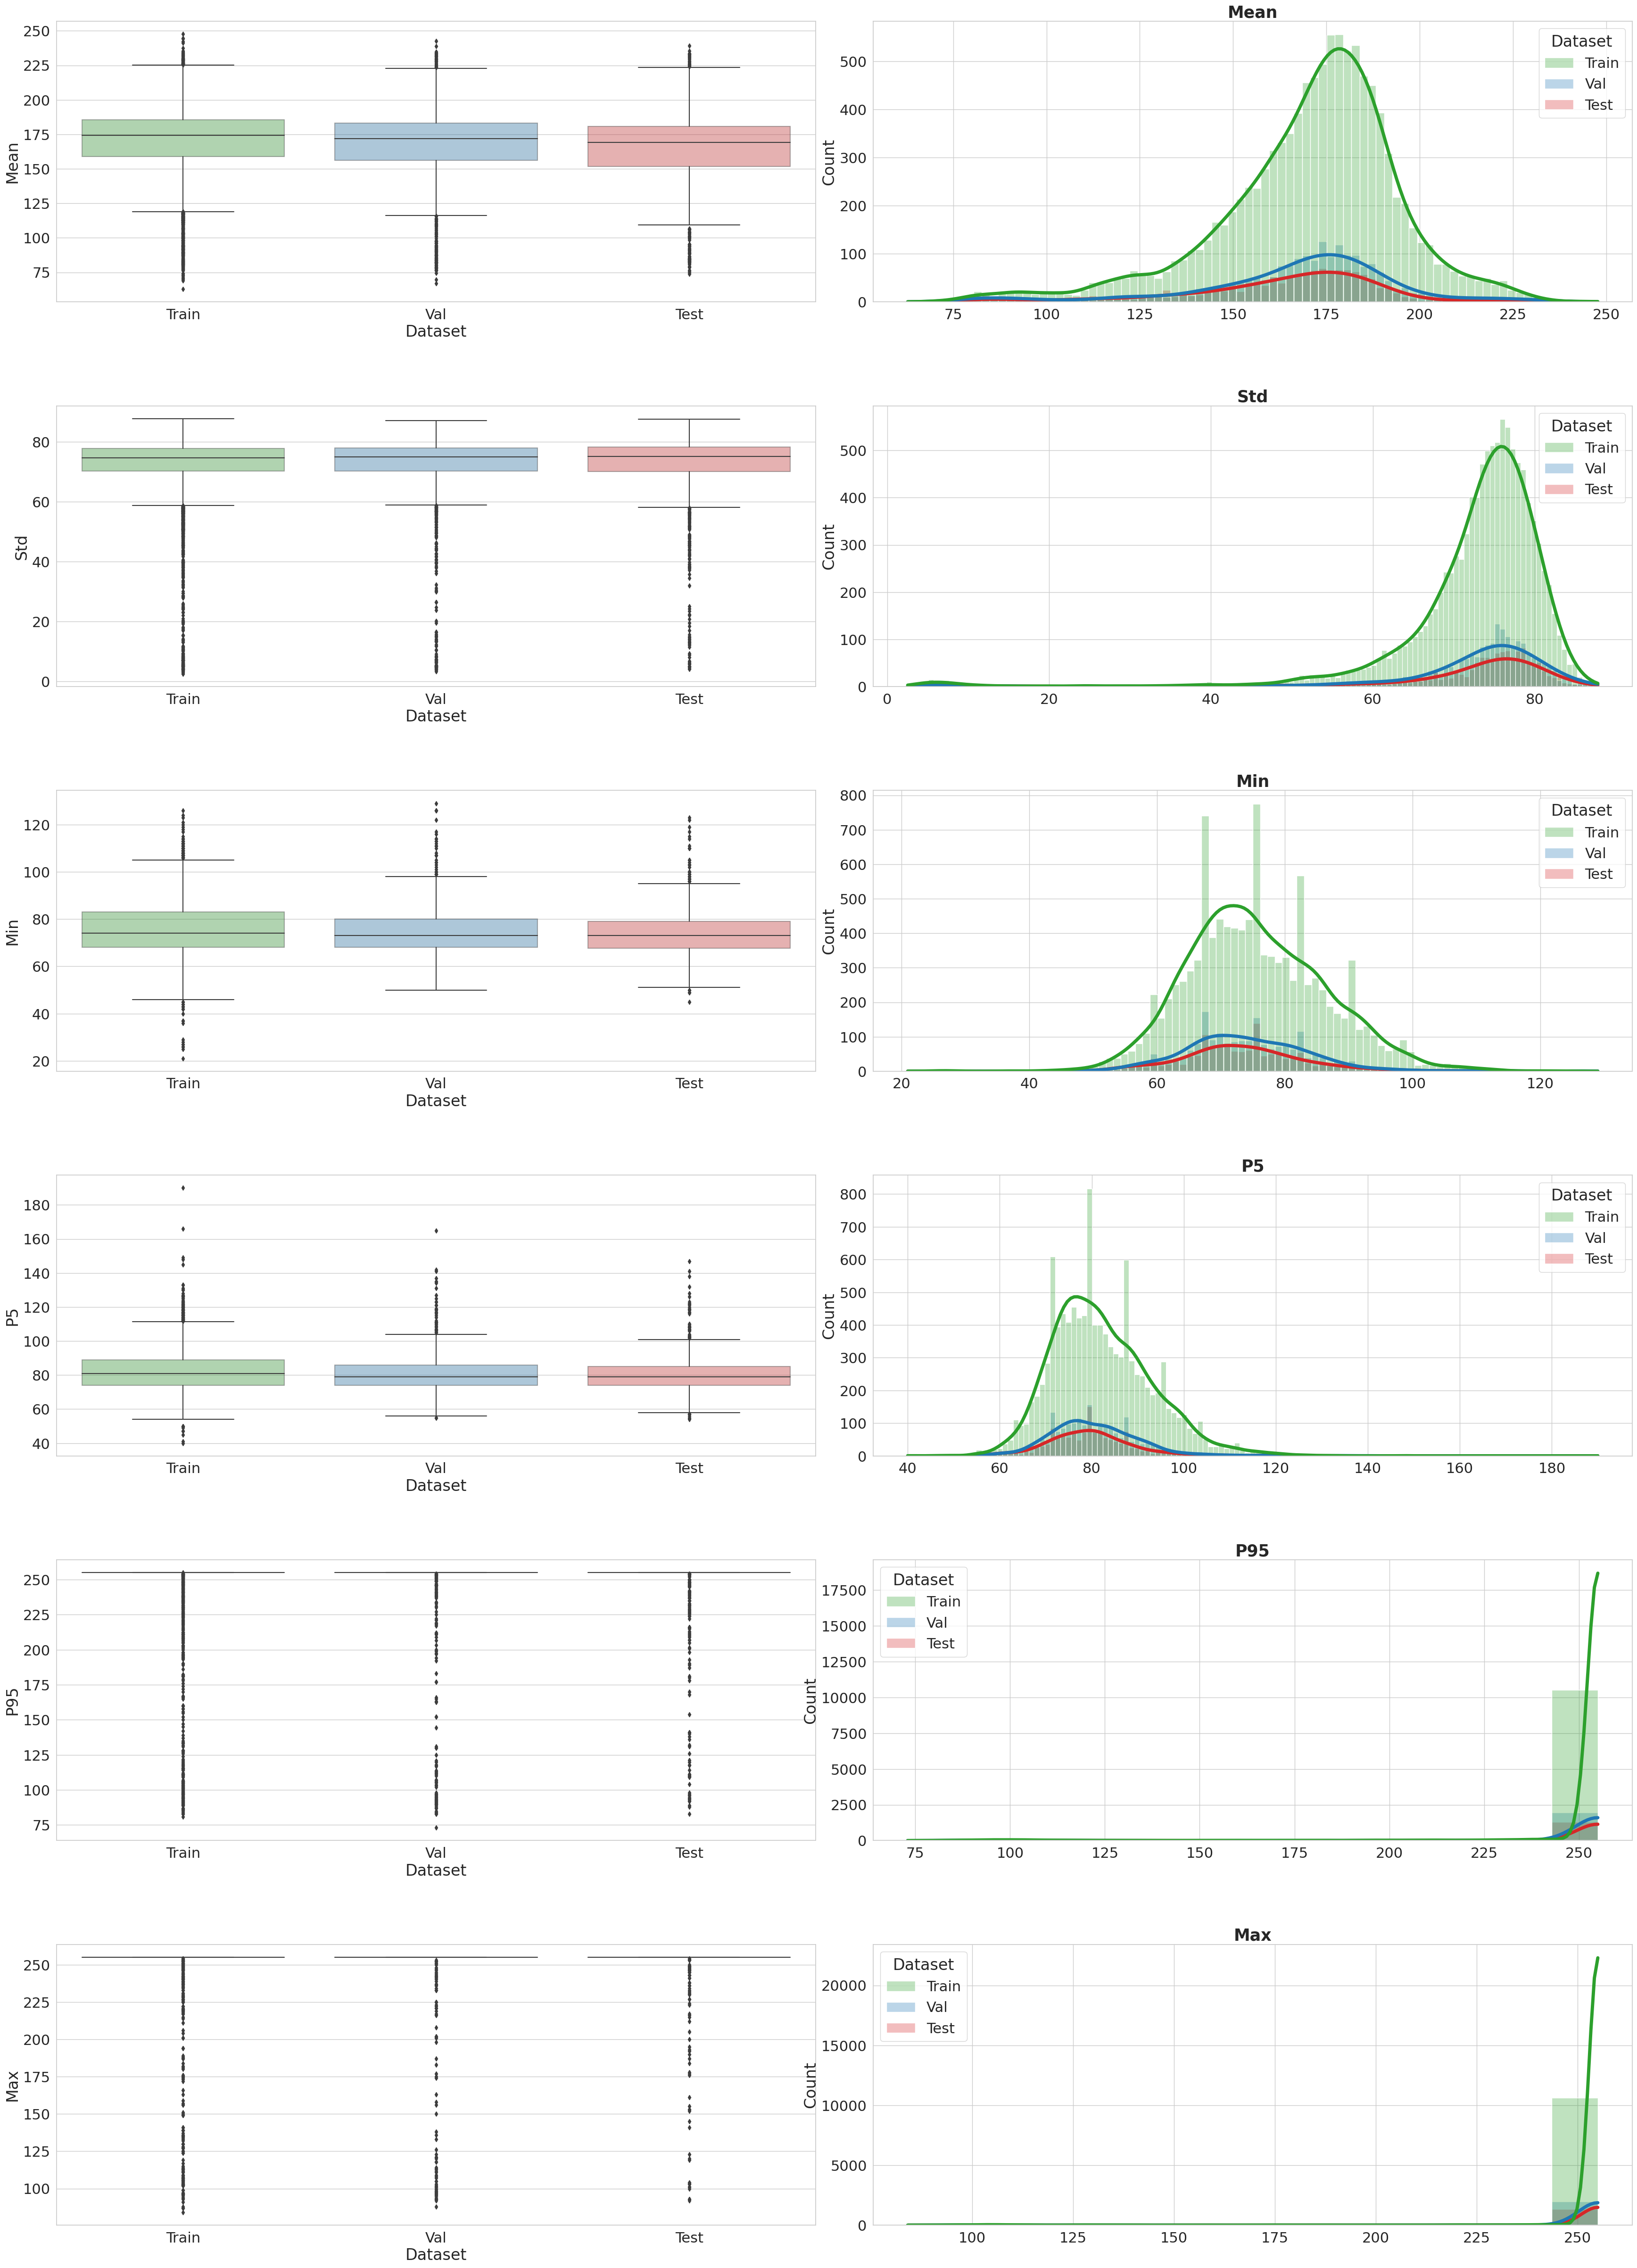

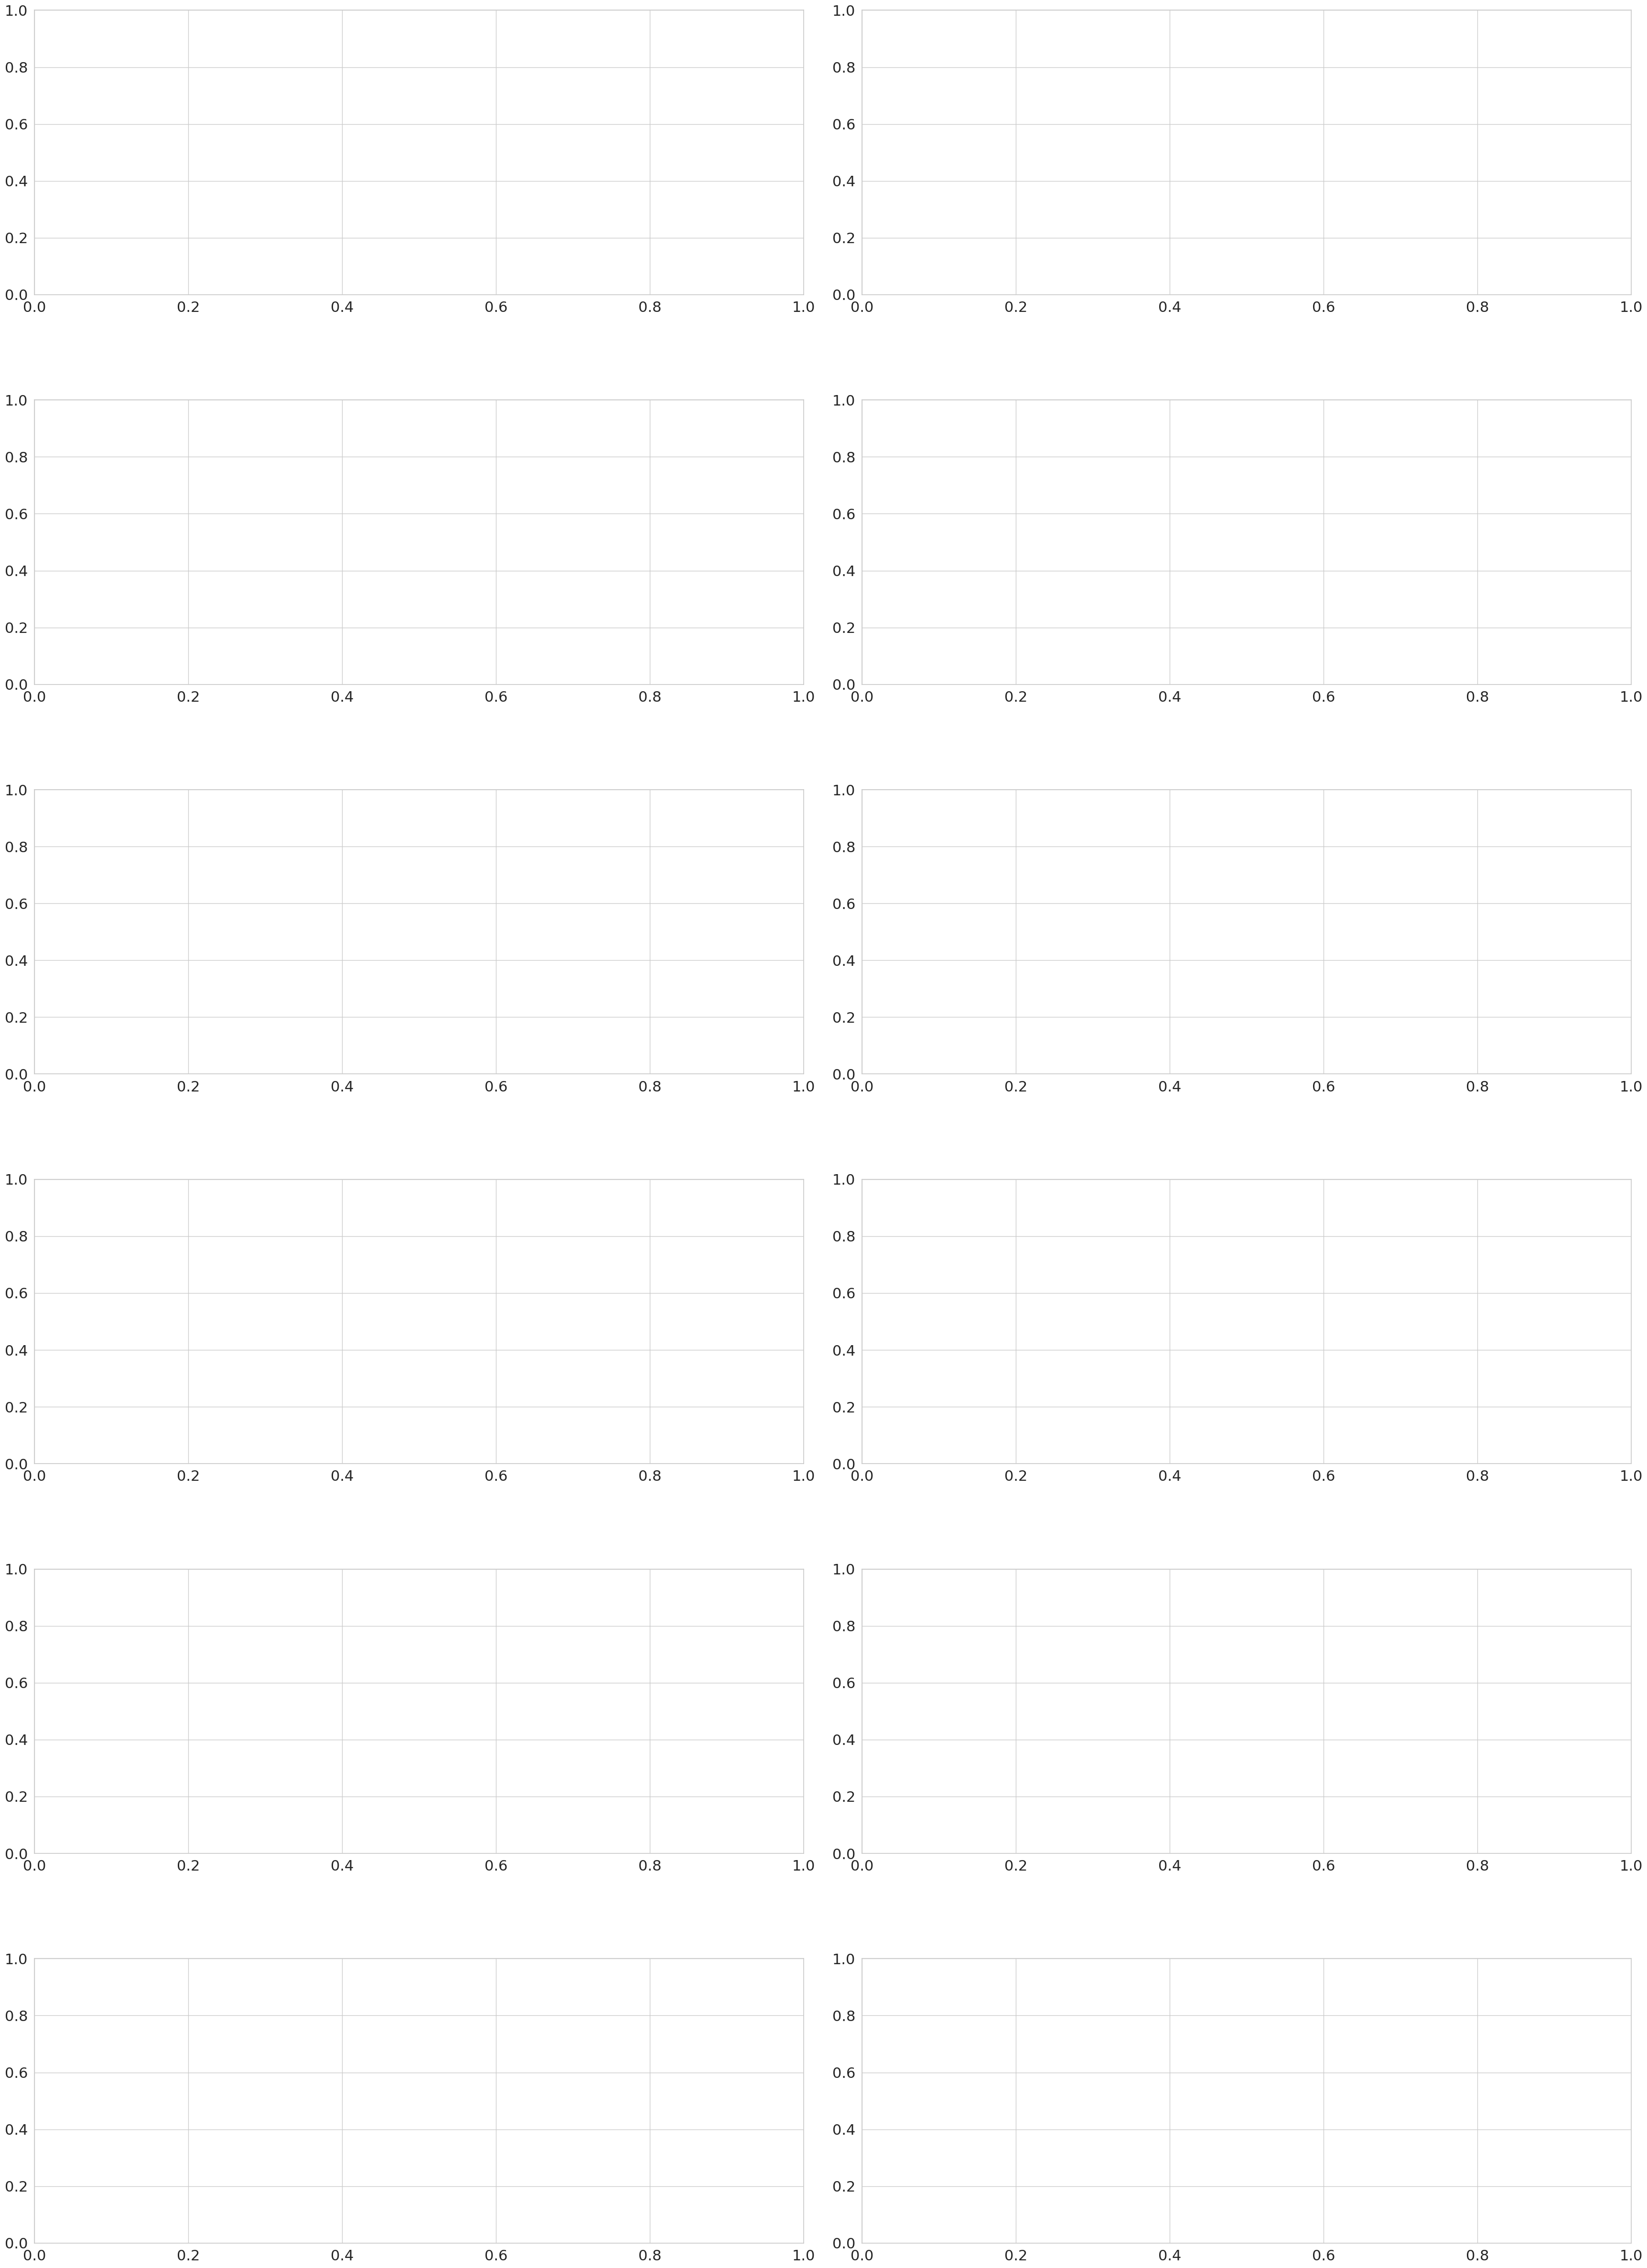

In [ ]:
disp_hue_regplot_labels(df)
disp_hue_regplot_dataset(df)

________________train_____________
Number of instances - Clog: 7091
Overall Mean Pixel Value Clog: 171.76298979870182
Overall Standard Deviation Clog: 71.8650002933059
Overall Min Pixel Value Clog: 46
Overall Max Pixel Value Clog: 255
number of instances - leak: 3723
Overall Mean Pixel Value leak: 167.99809928215703
Overall Standard Deviation leak: 73.87712520989787
Overall Min Pixel Value leak: 21
Overall Max Pixel Value leak: 255
Class 0: 7091 instances
Class 1: 3723 instances


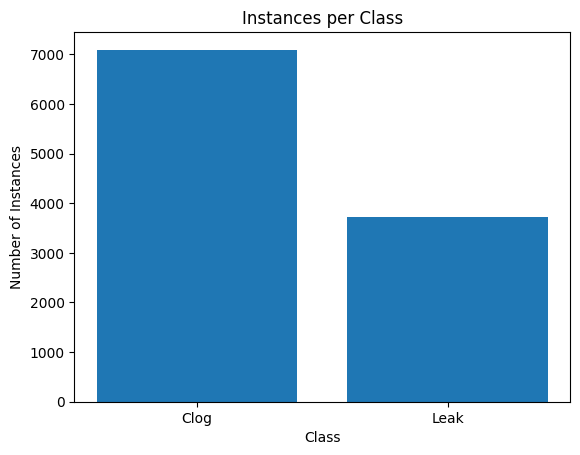

________________val_____________
Number of instances - Clog: 1345
Overall Mean Pixel Value Clog: 163.62432318179907
Overall Standard Deviation Clog: 69.50685971695742
Overall Min Pixel Value Clog: 50
Overall Max Pixel Value Clog: 255
number of instances - leak: 729
Overall Mean Pixel Value leak: 173.67545337835674
Overall Standard Deviation leak: 75.0955935998174
Overall Min Pixel Value leak: 51
Overall Max Pixel Value leak: 255
Class 0: 1345 instances
Class 1: 729 instances


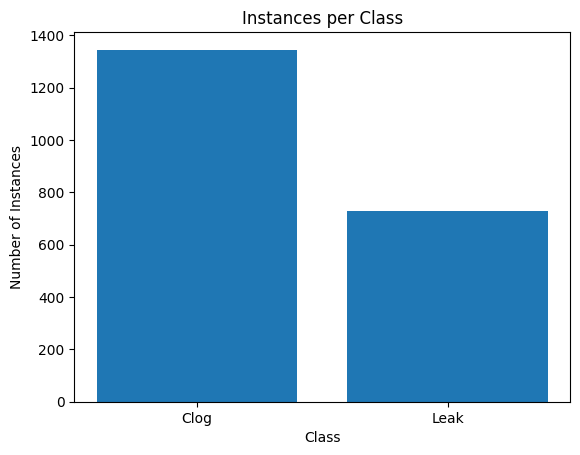

________________test_____________
Number of instances - Clog: 741
Overall Mean Pixel Value Clog: 160.65780176399943
Overall Standard Deviation Clog: 68.88712070274313
Overall Min Pixel Value Clog: 45
Overall Max Pixel Value Clog: 255
number of instances - leak: 663
Overall Mean Pixel Value leak: 167.30791365308986
Overall Standard Deviation leak: 74.7161601481331
Overall Min Pixel Value leak: 53
Overall Max Pixel Value leak: 255
Class 0: 741 instances
Class 1: 663 instances


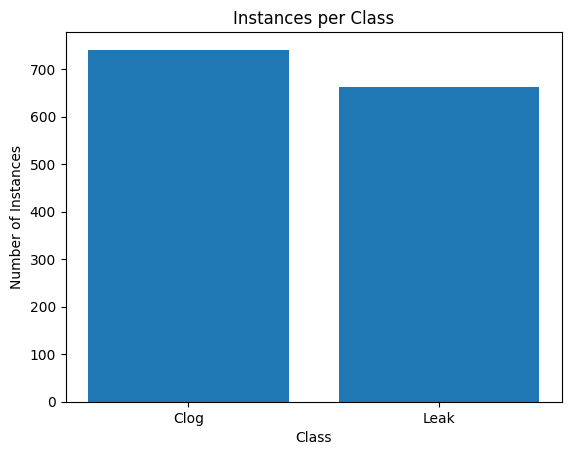

________________B_________________
Number of instances - Clog: 1817
Overall Mean Pixel Value Clog: 180.6772750835575
Overall Standard Deviation Clog: 70.96889814623842
Overall Min Pixel Value Clog: 63
Overall Max Pixel Value Clog: 255


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: ignored

In [ ]:
print("________________train_____________")
statistics_folder('/content/datasets/train/images','/content/datasets/train/labels')
data_labels_count('/content/datasets/train/labels')

print("________________val_____________")
statistics_folder('/content/datasets/val/images','/content/datasets/val/labels')
data_labels_count('/content/datasets/val/labels')

print("________________test_____________")
statistics_folder('/content/datasets/test/images','/content/datasets/test/labels')
data_labels_count('/content/datasets/test/labels')
print("________________B_________________")
statistics_folder('/content/datasets/B_organize/images','/content/datasets/B_organize/labels')
data_labels_count('/content/datasets/B_organize/labels')